### Numpy basics

In [1]:
import numpy as np

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [ ]:
#Exercise 1)

m = np.arange(12).reshape((3,4))
print(m)

In [ ]:
#Exercise 2)
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])


#a)
x=np.outer(u,v)
print(x)

#b)
y=np.zeros([4,4])
for i in range(0,4):
    for j in range(0,4):
        y[i,j]=u[i]*v[j]
    
print(y)

#c)
z=np.zeros((4,4))
uu=np.reshape(u,(4,1))
z=uu*v
print(z)

3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [ ]:
#Exercise 3)

A = np.random.random((10,6))
#print(A)


for i in range(0,10):
    for j in range(0,6):
        if A[i,j]<0.1:
            A[i,:]=0
print(A)

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

In [ ]:
#Exercise 4)
from math import pi
A=np.linspace(0,2*pi,100)
print("A",A)



B=A[::10]
print("B",B)



C=A[::-1]
print("C",C)



import math
D=[]
for i in range(100):
    if abs(math.sin(A[i])-math.cos(A[i]))<0.1:
        D.append(A[i])
print("D=", D)



import matplotlib.pyplot as plt

cosine = np.cos(A)
sine = np.sin(A)

plt.plot(A,cosine)
plt.plot(A, sine)
plt.plot(D,np.sin(D), color="green", marker="o",linestyle="")
plt.plot(D,np.cos(D), color="red", marker="o",linestyle="")

plt.show()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [ ]:
#Execise 5)

A=np.zeros([10,10])
for i in range(0,10):
    for j in range(0,10):
        A[i,j]=(i+1)*(j+1)
        
print(A)

trace=0
for i in range(10):
    trace=trace+A[i,i]
print(trace)


B=np.zeros(10)
for i in range(10):
    B[i]=A[i,9-i]
print(B)

C=np.zeros(9)
for i in range(9):
    C[i]=A[i,i+1]
print(C)

6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [ ]:
#Execise 6)
dis={"Chicago":0, "Springfield":198, "Saint-Louis":303, "Tulsa":736, "Oklaoma City":871, "Amarillo":1175, "Santa Fe":1475, "Albuquerque":1544, "Flagstaff":1913, "Los Angeles":2448}


distance=[0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448]

tab=np.zeros([10,10])
for i in range(0,10):
    for j in range(0,10):
        tab[i,j]=abs(distance[i]-distance[j])
print(tab)

tab=tab*1.60934
print(tab)

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [ ]:
import time

start = time.time()
N=100
num=[]
prime = [True for i in range(N)] 
for i in range(2,N):
    for j in range(i+1,N):
        if j%i==0:
            prime[j]=False
for i in range(2,N):
    if prime[i]==True:
        num.append(i)
#averageprint(num)
end = time.time()
print(N,end - start)



start = time.time()
N=1000
num=[]
prime = [True for i in range(N)] 
for i in range(2,N):
    for j in range(i+1,N):
        if j%i==0:
            prime[j]=False
for i in range(2,N):
    if prime[i]==True:
        num.append(i)
#averageprint(num)
end = time.time()
print(N,end - start)


start = time.time()
N=10000
num=[]
prime = [True for i in range(N)] 
for i in range(2,N):
    for j in range(i+1,N):
        if j%i==0:
            prime[j]=False
for i in range(2,N):
    if prime[i]==True:
        num.append(i)
#averageprint(num)
end = time.time()
print(N,end - start)


#With this method time scales with N^2


def prime_eratosthenes(n):
    prime_list = []
    prime=[]
    for i in range(2, n+1):
        if i not in prime_list:
            prime.append(i)
            for j in range(i*i, n+1, i):
                prime_list.append(j)
    
start = time.time()
prime_eratosthenes(N)
end = time.time()
print(end - start)

8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

In [ ]:
import matplotlib.pyplot as plt
l = 200
walker=1000
matrix= np.zeros([walker,l])
for j in range(walker):
    for i in range(l):
        matrix[j,i]=(np.random.choice([-1, 0])+0.5)*2

#print(matrix)
position=np.zeros([walker,l])
for j in range(walker):
    position[0,i]=matrix[0,i]
    for i in range(1,l):
        position[j,i]=position[j,i-1]+matrix[j,i]



square=position**2
mean=np.zeros(l)
for i in range(l):
    for j in range(walker):
        mean[i]+=square[j,i]/walker
#print(mean)
average=mean**0.5
plt.plot(average) 


#yes, i get what expected. The average distances is a function of the square root of time

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

In [3]:
! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt

--2020-11-02 22:25:27--  https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.1
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3vigxoqayo389uc/populations.txt [following]
--2020-11-02 22:25:28--  https://www.dropbox.com/s/raw/3vigxoqayo389uc/populations.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc971807287189052f3a5bbebccf.dl.dropboxusercontent.com/cd/0/inline/BCdFCl24EZw2At_NeB-5txOpKfNaVbHiOiGgfY4TtdZWGBHkl3zaSTl12v-4yxyHQhVJ0OVHeWADsrdweZUlfqXhQ66v65_Y8MfXwRh7Z7uVPQ/file# [following]
--2020-11-02 22:25:28--  https://uc971807287189052f3a5bbebccf.dl.dropboxusercontent.com/cd/0/inline/BCdFCl24EZw2At_NeB-5txOpKfNaVbHiOiGgfY4TtdZWGBHkl3zaSTl12v-4yxyHQhVJ0OVHeWADsrdweZUlfqXhQ66v65_Y8MfXwRh7Z7uVPQ/file
Resolving uc971807287189052f3a5bbeb

In [4]:
c=np.loadtxt("populations.txt")


Carrots had the highest population in  1900 
Carrots had the highest population in  1901 
Hares had the highest population in  1902 
Hares had the highest population in  1903 
Lynxes had the highest population in  1904 
Lynxes had the highest population in  1905 
Carrots had the highest population in  1906 
Carrots had the highest population in  1907 
Carrots had the highest population in  1908 
Carrots had the highest population in  1909 
Carrots had the highest population in  1910 
Carrots had the highest population in  1911 
Hares had the highest population in  1912 
Hares had the highest population in  1913 
Hares had the highest population in  1914 
Lynxes had the highest population in  1915 
Carrots had the highest population in  1916 
Carrots had the highest population in  1917 
Carrots had the highest population in  1918 
Carrots had the highest population in  1919 
Carrots had the highest population in  1920 


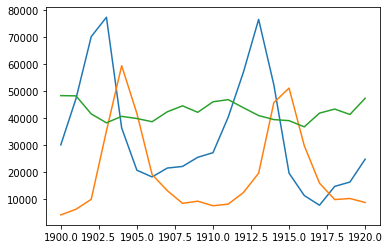

In [5]:
year=np.zeros(21)
hare=np.zeros(21)
lynx=np.zeros(21)
carrot=np.zeros(21)

for i in range(21):
    year[i]=c[i,0]
    hare[i]=c[i,1]
    lynx[i]=c[i,2]
    carrot[i]=c[i,3]

    
from matplotlib import pyplot as plt
plt.plot(year,hare)
plt.plot(year,lynx)
plt.plot(year,carrot)

m_hare=np.mean(hare)
m_lynx=np.mean(lynx)
m_carrot=np.mean(carrot)


m_hare=np.std(hare)
m_lynx=np.std(lynx)
m_carrot=np.std(carrot)


corr12= np.corrcoef(hare, lynx)
corr23=np.corrcoef(lynx, carrot)
corr31=np.corrcoef(carrot, hare)
 
for i in range(21):
    result = np.where(c == np.amax(c[i,:]))
    if result[1]==[1]:
        print("Hares had the highest population in ", int(c[i,0]), "")
    elif result[1]==[2]:
        print("Lynxes had the highest population in ", int(c[i,0]), "")
    else:
        print("Carrots had the highest population in ", int(c[i,0]), "")
        
#Yes, from the results i can feel a strong correlation, 
#despite the low correlation between hares and lynxes and between hares and carrots